In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, cross_validation
%matplotlib inline

C:\Users\ra20024902\Downloads\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#reading the input file
df_mpg = pd.read_csv('carMPG.csv',sep=',',index_col=None)

In [3]:
df_mpg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2015,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2015,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2015,1,ford torino


In [4]:
type(df_mpg)

pandas.core.frame.DataFrame

In [5]:
df_mpg.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [6]:
df_mpg.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model_year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.489447,5.454774,193.425879,2970.424623,15.568090,2008.989950,1.572864
std,7.849757,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,8.000000,3.000000,68.000000,1613.000000,8.000000,2003.000000,1.000000
25%,17.125000,4.000000,104.250000,2223.750000,13.825000,2006.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,2009.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,2012.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,2015.000000,3.000000


In [7]:
#Identifying target and independent variables
model = pd.DataFrame(df_mpg, columns = ['MPG', 'Acceleration'])
model.head()

,MPG,Acceleration
0,8.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5


In [8]:
#function to Compute error for the line given the points
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        totalError += (y - (m*x + b)) ** 2
    return totalError / float(len(points))

In [9]:
#Step gradient function
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [10]:
#function for Gradient descent
def gradient_descent_runner(points, starting_b, starting_m, learningrate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learningrate)
    return [b, m]

In [11]:
points = model
points = points.reset_index().values
points[:10]

array([[  0. ,   8. ,  12. ],
       [  1. ,  15. ,  11.5],
       [  2. ,  18. ,  11. ],
       [  3. ,  16. ,  12. ],
       [  4. ,  17. ,  10.5],
       [  5. ,  15. ,  10. ],
       [  6. ,  14. ,   9. ],
       [  7. ,  14. ,   8.5],
       [  8. ,  14. ,  10. ],
       [  9. ,  15. ,   8.5]])

In [12]:
#initilizing variables
learningrate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 1000

In [13]:
#Calling function
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b,initial_m,compute_error_for_line_given_points(initial_b, initial_m, points)))


Starting gradient descent at b = 0, m = 0, error = 613.2179899497488


In [14]:
#implementing gradient descent on every iterations
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learningrate, num_iterations)

In [15]:
 print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

After 1000 iterations b = 0.1211874783663623, m = 1.4920263083109613, error = 51.13854646383735


In [16]:
points

array([[   0. ,    8. ,   12. ],
       [   1. ,   15. ,   11.5],
       [   2. ,   18. ,   11. ],
       ..., 
       [ 395. ,   32. ,   11.6],
       [ 396. ,   28. ,   18.6],
       [ 397. ,   31. ,   19.4]])

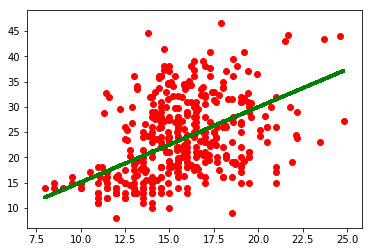

In [19]:
# Ploting outputs
for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        plt.scatter(x,y,color='red')

        plt.plot(model.Acceleration, (1.4920263083109613 * model.Acceleration + 0.1211874783663623), color='green',linewidth=3)